In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/Pharmacy/D5.csv', parse_dates=['date'], dayfirst=True)

In [3]:
df.head()

,date,itemname,packunits,expiry,price,looseqty
0,2022-07-01,PANADOL TAB,200,4/25/24,1.70,60
1,2022-07-02,PANADOL TAB,200,4/25/24,1.70,70
2,2022-07-03,PANADOL TAB,200,4/25/24,1.70,55
3,2022-07-05,PANADOL TAB,200,4/25/24,1.45,20
4,2022-07-08,PANADOL TAB,200,4/25/24,1.70,70


In [4]:
df.rename(columns={'date': 'ds', 'looseqty': 'y'}, inplace=True)

In [5]:
model = Prophet()
model.fit(df)

00:23:58 - cmdstanpy - INFO - Chain [1] start processing
00:23:58 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=365)

In [7]:
forecast = model.predict(future)

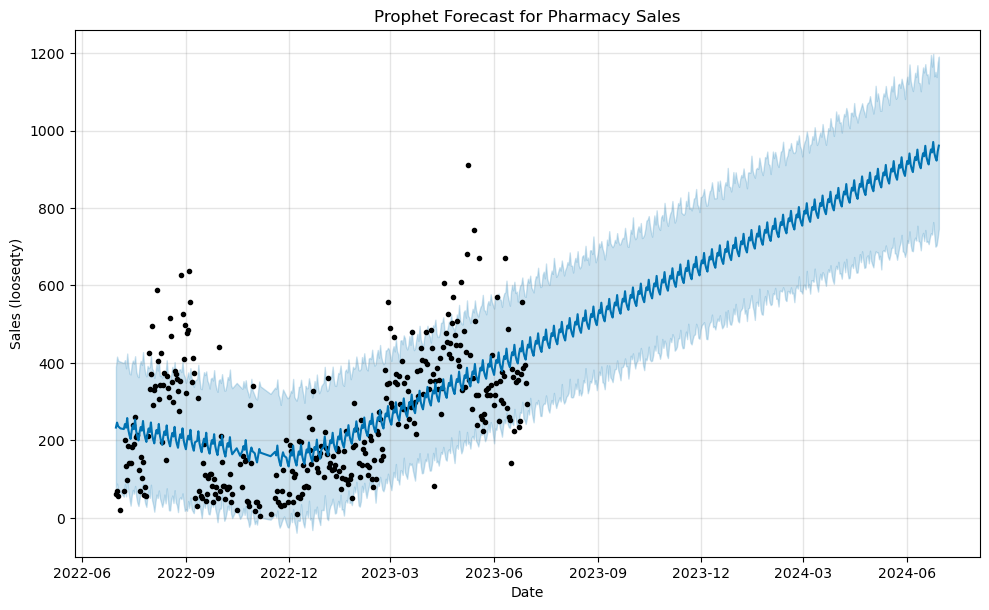

In [8]:
fig = model.plot(forecast)
plt.title('Prophet Forecast for Pharmacy Sales')
plt.xlabel('Date')
plt.ylabel('Sales (looseqty)')
plt.show()